Importar libreria Pandas

In [1]:
import pandas as pd

1. Cargue en un Dataframe los datos de los accidentes de los últimos 3 años

In [2]:
pd.set_option('display.max_columns', None)
anual_2021 = pd.read_csv("./conjunto_de_datos/atus_anual_2021.csv", index_col=False)
anual_2022 = pd.read_csv("./conjunto_de_datos/atus_anual_2022.csv", index_col=False)
anual_2023= pd.read_csv("./conjunto_de_datos/atus_anual_2023.csv", index_col=False)

dataset = pd.concat([anual_2021, anual_2022, anual_2023],ignore_index=True)

2. Agregue una columna tipo date formada por los valores de las columnas correspondientes a Año, Mes, Dia, Hora y Minuto.

In [3]:
dataset.insert(3, 'DATE', dataset['ANIO'].astype(str) + '-' + dataset['MES'].astype(str).str.zfill(2) + '-' 
               + dataset['ID_DIA'].astype(str).str.zfill(2) + ' ' + dataset['ID_HORA'].astype(str).str.zfill(2) + ':' 
               + dataset['ID_MINUTO'].astype(str).str.zfill(2))

dataset

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,DATE,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,3,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,Sí,Se ignora,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
1,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,99,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
2,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,1,0,0,0,Peatón o pasajero,Pavimentada,Hombre,No,Se ignora,59,0,0,0,0,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas
3,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,No,18,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
4,Municipal,1,1,2021-01-01 00:50,2021,1,0,50,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,0,0,0,0,Peatón o pasajero,Pavimentada,Se fugó,Se ignora,Se ignora,0,0,0,0,0,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145648,Municipal,32,56,2023-12-27 14:45,2023,12,14,45,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Volcadura,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Mujer,No,No,19,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
1145649,Municipal,32,56,2023-12-27 21:40,2023,12,21,40,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Colisión con motocicleta,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
1145650,Municipal,32,56,2023-12-29 14:30,2023,12,14,30,29,Viernes,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,26,0,0,0,1,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
1145651,Municipal,32,56,2023-12-30 00:00,2023,12,0,0,30,Sabado,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,31,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


3. Agregue una columna para Área cuyos valores serán Urbana o Suburbana dependiendo del área donde ocurrió el accidente.

In [5]:
def asignar_area(row):
    if row['URBANA'] == 'Sin accidente en esta zona':
        return 'SUBURBANA'
    elif row['URBANA'] == 'Accidente en intersección':
        return 'URBANA'
    elif row['URBANA'] == 'Accidente en no intersección':
        return 'URBANA'
    elif row['URBANA'] == 'Accidente en carretera estatal':
        return 'SUBURBANA'
    
dataset['AREA'] = dataset.apply(asignar_area, axis=1)

dataset

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,DATE,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,AREA
0,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,3,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,Sí,Se ignora,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,URBANA
1,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,99,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,URBANA
2,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,1,0,0,0,Peatón o pasajero,Pavimentada,Hombre,No,Se ignora,59,0,0,0,0,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas,URBANA
3,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,No,18,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,URBANA
4,Municipal,1,1,2021-01-01 00:50,2021,1,0,50,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,0,0,0,0,Peatón o pasajero,Pavimentada,Se fugó,Se ignora,Se ignora,0,0,0,0,0,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas,URBANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145648,Municipal,32,56,2023-12-27 14:45,2023,12,14,45,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Volcadura,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Mujer,No,No,19,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,URBANA
1145649,Municipal,32,56,2023-12-27 21:40,2023,12,21,40,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Colisión con motocicleta,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,URBANA
1145650,Municipal,32,56,2023-12-29 14:30,2023,12,14,30,29,Viernes,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,26,0,0,0,1,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,URBANA
1145651,Municipal,32,56,2023-12-30 00:00,2023,12,0,0,30,Sabado,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,31,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,URBANA


4. Agregue una columna Zona cuyos valores serán la zona donde ocurrió el accidente

In [6]:
def asignar_zona(row):
    if row['AREA'] == 'URBANA':
        return row['URBANA']
    else:
        return row['SUBURBANA']

dataset['ZONA'] = dataset.apply(asignar_zona, axis=1)

dataset

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,DATE,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,AREA,ZONA
0,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,3,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,Sí,Se ignora,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,URBANA,Accidente en intersección
1,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,99,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,URBANA,Accidente en intersección
2,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,1,0,0,0,Peatón o pasajero,Pavimentada,Hombre,No,Se ignora,59,0,0,0,0,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas,URBANA,Accidente en intersección
3,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,No,18,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,URBANA,Accidente en intersección
4,Municipal,1,1,2021-01-01 00:50,2021,1,0,50,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,0,0,0,0,Peatón o pasajero,Pavimentada,Se fugó,Se ignora,Se ignora,0,0,0,0,0,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas,URBANA,Accidente en intersección
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145648,Municipal,32,56,2023-12-27 14:45,2023,12,14,45,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Volcadura,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Mujer,No,No,19,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,URBANA,Accidente en no intersección
1145649,Municipal,32,56,2023-12-27 21:40,2023,12,21,40,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Colisión con motocicleta,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,URBANA,Accidente en no intersección
1145650,Municipal,32,56,2023-12-29 14:30,2023,12,14,30,29,Viernes,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,26,0,0,0,1,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,URBANA,Accidente en no intersección
1145651,Municipal,32,56,2023-12-30 00:00,2023,12,0,0,30,Sabado,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,31,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,URBANA,Accidente en no intersección


5. Elimine las columnas URBANA y SUBURBANA

In [7]:
dataset.drop(['URBANA', 'SUBURBANA'], axis=1 , inplace=True)

dataset

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,DATE,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,AREA,ZONA
0,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Colisión con vehículo automotor,3,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,Sí,Se ignora,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,URBANA,Accidente en intersección
1,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Colisión con vehículo automotor,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,99,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,URBANA,Accidente en intersección
2,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,1,0,0,0,Peatón o pasajero,Pavimentada,Hombre,No,Se ignora,59,0,0,0,0,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas,URBANA,Accidente en intersección
3,Municipal,1,1,2021-01-01 00:00,2021,1,0,0,1,Viernes,Colisión con objeto fijo,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,No,18,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,URBANA,Accidente en intersección
4,Municipal,1,1,2021-01-01 00:50,2021,1,0,50,1,Viernes,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,0,0,0,0,Peatón o pasajero,Pavimentada,Se fugó,Se ignora,Se ignora,0,0,0,0,0,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas,URBANA,Accidente en intersección
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145648,Municipal,32,56,2023-12-27 14:45,2023,12,14,45,27,Miercoles,Volcadura,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Mujer,No,No,19,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,URBANA,Accidente en no intersección
1145649,Municipal,32,56,2023-12-27 21:40,2023,12,21,40,27,Miercoles,Colisión con motocicleta,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,URBANA,Accidente en no intersección
1145650,Municipal,32,56,2023-12-29 14:30,2023,12,14,30,29,Viernes,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,26,0,0,0,1,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,URBANA,Accidente en no intersección
1145651,Municipal,32,56,2023-12-30 00:00,2023,12,0,0,30,Sabado,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,31,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,URBANA,Accidente en no intersección


7. Resuma los accidentes del último año por tipo y que porcentaje representan

In [10]:

accidentes_2023 = dataset[dataset['ANIO'] == 2023]
total_accidentes2023 = accidentes_2023['TIPACCID'].value_counts(normalize=True) * 100
total_accidentes2023 = total_accidentes2023.reset_index()
total_accidentes2023.columns = ['TIPACCID', 'PORCENTAJE']

total_accidentes2023


,TIPACCID,PORCENTAJE
0,Colisión con vehículo automotor,58.621429
1,Colisión con motocicleta,14.477294
2,Colisión con objeto fijo,11.152264
3,Certificado cero,3.928114
4,Colisión con peatón (atropellamiento),2.988443
5,Volcadura,2.886584
6,Salida del camino,2.579747
7,Otro,1.463588
8,Colisión con ciclista,0.990349
9,Caída de pasajero,0.490888


8. Obtenga la cantidad de muertos y lesionados de los últimos 3 años

In [12]:

anios = [2021, 2022, 2023]

dataset_anios = dataset[dataset["ANIO"].isin(anios)]

total_muertos = dataset_anios[['CONDMUERTO', 'PASAMUERTO', 'PEATMUERTO', 'CICLMUERTO', 'OTROMUERTO', 'NEMUERTO']].sum().sum()

total_lesiones = dataset_anios[['CONDHERIDO', 'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO', 'NEHERIDO']].sum().sum()

print(f"Total de muertos de los últimos 3 años: {total_muertos}")
print(f"Total de lesionados de los últimos 3 años: {total_lesiones}")


Total de muertos de los últimos 3 años: 14385
Total de lesionados de los últimos 3 años: 264467


9. ¿Cómo se compara el número de accidentes de cada año contra el anterior? ¿En qué porcentaje varió?

In [14]:
anios = [2021, 2022, 2023]

cantidad_muertos = {}
cantidad_lesionados = {}

variacionesMuertos = {}
variacionesLesionados = {}

for anio in anios:
    dataset_anio = dataset[dataset["ANIO"] == anio]
    
    cantidad_muertos[anio] = dataset_anio[['CONDMUERTO', 'PASAMUERTO', 'PEATMUERTO', 'CICLMUERTO', 'OTROMUERTO', 'NEMUERTO']].sum().sum()
    
    cantidad_lesionados[anio] = dataset_anio[['CONDHERIDO', 'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO', 'NEHERIDO']].sum().sum()

for i in range(1, len(anios)):
    anio_actual = anios[i]
    anio_anterior = anios[i - 1]
    
    if cantidad_muertos[anio_anterior] != 0:
        variacionesMuertos[anio_actual] = ((cantidad_muertos[anio_actual] - cantidad_muertos[anio_anterior]) / cantidad_muertos[anio_anterior]) * 100
    
    if cantidad_lesionados[anio_anterior] != 0:
        variacionesLesionados[anio_actual] = ((cantidad_lesionados[anio_actual] - cantidad_lesionados[anio_anterior]) / cantidad_lesionados[anio_anterior]) * 100

for anio in anios:
    if anio in variacionesMuertos and variacionesMuertos[anio] is not None:
        print(f"Cantidad de muertos en {anio}: {cantidad_muertos[anio]} (Variación: {variacionesMuertos[anio]:.2f}%)")
    else:
        print(f"Cantidad de muertos en {anio}: {cantidad_muertos[anio]}")
    
    if anio in variacionesLesionados and variacionesLesionados[anio] is not None:
        print(f"Cantidad de lesionados en {anio}: {cantidad_lesionados[anio]} (Variación: {variacionesLesionados[anio]:.2f}%)")
    else:
        print(f"Cantidad de lesionados en {anio}: {cantidad_lesionados[anio]}")


Cantidad de muertos en 2021: 4401
Cantidad de lesionados en 2021: 82466
Cantidad de muertos en 2022: 5181 (Variación: 17.72%)
Cantidad de lesionados en 2022: 91501 (Variación: 10.96%)
Cantidad de muertos en 2023: 4803 (Variación: -7.30%)
Cantidad de lesionados en 2023: 90500 (Variación: -1.09%)


10. Seleccione una o dos características y haga una gráfica de cada una de las siguientes:

    1. Histograma
    2. Dispersión
    3. Líneas

importar libreria matplotlib

In [15]:
import matplotlib.pyplot as plt

 Histograma

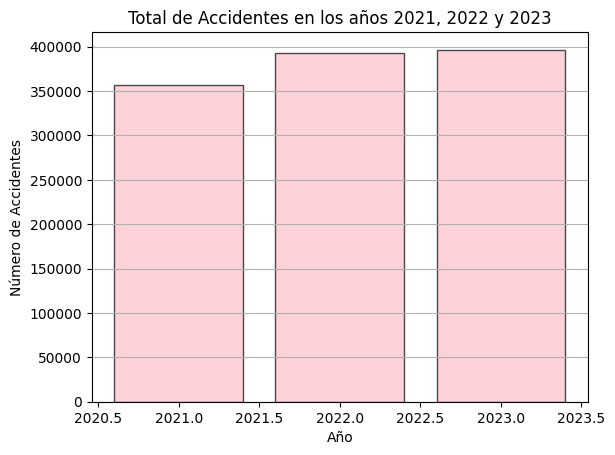

In [17]:

total_accidentes = {}

for anio in [2021, 2022, 2023]:
    accidentes_anio = dataset[dataset['ANIO'] == anio]
    total_accidentes[anio] = len(accidentes_anio)  

anios = list(total_accidentes.keys())
totales = list(total_accidentes.values())

plt.bar(anios, totales, color='pink', edgecolor='black', alpha=0.7)

plt.title('Total de Accidentes en los años 2021, 2022 y 2023')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.grid(axis='y')
plt.show()



Dispersión

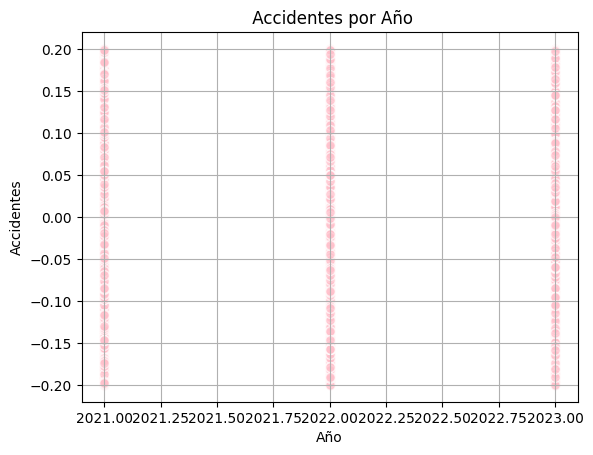

In [19]:

import random

puntos_x = []
puntos_y = []

for anio in [2021, 2022, 2023]:
    accidentes_anio = dataset[dataset['ANIO'] == anio]
    
    for accidente in accidentes_anio.itertuples():
        puntos_x.append(anio)
        desplazamiento_y = random.uniform(-0.2, 0.2) 
        puntos_y.append(desplazamiento_y) 

plt.scatter(puntos_x, puntos_y, color='pink', edgecolor='white', alpha=0.7, s=50)
plt.title(' Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Accidentes')

plt.grid(True)
plt.show()

Lineas

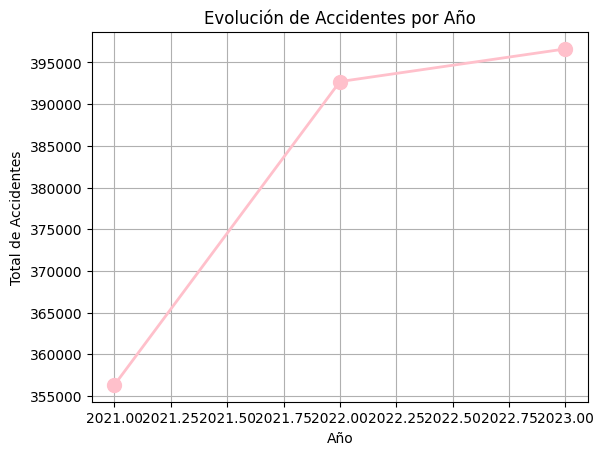

In [20]:

anios = [2021, 2022, 2023]
total_accidentes = []

for anio in anios:
    accidentes_anio = dataset[dataset['ANIO'] == anio]
    total_accidentes.append(len(accidentes_anio)) 

plt.plot(anios, total_accidentes, marker='o', color='pink', linestyle='-', linewidth=2, markersize=10)

plt.title('Evolución de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Total de Accidentes')
plt.grid(True)
plt.show()
